Question 1

In [ ]:
import sympy as sp

# Define symbolic variables
alpha_0, alpha_1, alpha_2 = sp.symbols('alpha_0 alpha_1 alpha_2')
beta_0, beta_1, beta_2, beta_3 = sp.symbols('beta_0 beta_1 beta_2 beta_3')
sigma_e, sigma_v = sp.symbols('sigma_e sigma_v')

X_t_minus_1 = sp.Matrix([
    sp.symbols('y_t_-_1'),
    sp.symbols('c_t_-_1'),
    sp.symbols('c_t_-_2')
])

Xi_t = sp.Matrix([
    sp.symbols('epsilon_t'),
    sp.symbols('nu_t')
])

A = sp.Matrix([
    [alpha_1, alpha_2, 0],
    [beta_3, beta_1, beta_2],
    [0, 1, 0]  # Shift mechanism for lag
])

B = sp.Matrix([
    [alpha_0],
    [beta_0],
    [0]
])

C = sp.Matrix([
    [1, 0],
    [0, 1],
    [0, 0]
])

# System equation in matrix form
X_t = B + A * X_t_minus_1 + C * Xi_t

print("State equation in matrix form:")
sp.pprint(sp.Eq(sp.MatrixSymbol('X_t', 3, 1), B + A * X_t_minus_1 + C * Xi_t))


State equation in matrix form:
     ⎡      α₀ + α₁⋅yₜ ₋ ₁ + α₂⋅cₜ ₋ ₁ + εₜ      ⎤
     ⎢                                           ⎥
Xₜ = ⎢β₀ + β₁⋅cₜ ₋ ₁ + β₂⋅cₜ ₋ ₂ + β₃⋅yₜ ₋ ₁ + νₜ⎥
     ⎢                                           ⎥
     ⎣                  cₜ ₋ ₁                   ⎦


In [ ]:
import numpy as np

# Define the state vector z_t (current values)
z_t = np.array([
    ['y_t'],       # Output variable
    ['c_t'],       # Cost variable (first lag)
    ['c_t-1']      # Cost variable (second lag)
])

# Define the state vector z_t-1 (previous values)
z_t_minus_1 = np.array([
    ['y_t-1'],
    ['c_t-1'],
    ['c_t-2']
])

# Define the A matrix (transition matrix)
A = np.array([
    ['alpha_1', 'alpha_2', '0'],   # y_t equation
    ['beta_3', 'beta_1', 'beta_2'],  # c_t equation
    ['0', '1', '0']  # c_t-1 equation
])

# Define the noise vector ξ_t
xi_t = np.array([
    ['epsilon_t'],
    ['nu_t']
])

# Define the C matrix (mapping noise to the system)
C = np.array([
    ['1', '0'],   # Noise in y_t
    ['0', '1'],   # Noise in c_t
    ['0', '0']    # No noise in c_t-1
])

print("State Vector (z_t):")
print(z_t)

print("\nTransition Matrix (A):")
print(A)

print("\nNoise Vector (ξ_t):")
print(xi_t)

print("\nNoise Mapping Matrix (C):")
print(C)

print("\nFinal AR(1) Matrix Equation:")
print("z_t = A * z_t-1 + C * ξ_t")


State Vector (z_t):
[['y_t']
 ['c_t']
 ['c_t-1']]

Transition Matrix (A):
[['alpha_1' 'alpha_2' '0']
 ['beta_3' 'beta_1' 'beta_2']
 ['0' '1' '0']]

Noise Vector (ξ_t):
[['epsilon_t']
 ['nu_t']]

Noise Mapping Matrix (C):
[['1' '0']
 ['0' '1']
 ['0' '0']]

Final AR(1) Matrix Equation:
z_t = A * z_t-1 + C * ξ_t


Question 2

In [2]:
import numpy as np

# a/ Define the transition matrix
transition_matrix = np.array([
    [0.90, 0.10, 0.00],
    [0.20, 0.65, 0.15],
    [0.10, 0.05, 0.85]
])

# Check if the matrix is valid (rows should sum to 1)
row_sums = np.sum(transition_matrix, axis=1)
is_valid = np.allclose(row_sums, 1)

print("Transition Matrix:")
print(transition_matrix)
print("\nIs the transition matrix valid?", is_valid)

explanation = """
This Markov diagram represents how borrowers move between different credit risk categories: Subprime, Average, and Prime.
Each number on an arrow shows the probability of moving from one category to another.
- A Subprime borrower has a 90% chance of staying Subprime, 10% chance of improving to Average.
- An Average borrower has a 20% chance of dropping to Subprime, 65% chance of remaining Average, and 15% chance of improving to Prime.
- A Prime borrower has an 85% chance of staying Prime, 10% chance of dropping to Subprime, and 5% chance of dropping to Average.
This helps lenders understand how likely a borrower is to move between risk levels over time.
"""

print(explanation)


Transition Matrix:
[[0.9  0.1  0.  ]
 [0.2  0.65 0.15]
 [0.1  0.05 0.85]]

Is the transition matrix valid? True

This Markov diagram represents how borrowers move between different credit risk categories: Subprime, Average, and Prime.
Each number on an arrow shows the probability of moving from one category to another.
- A Subprime borrower has a 90% chance of staying Subprime, 10% chance of improving to Average.
- An Average borrower has a 20% chance of dropping to Subprime, 65% chance of remaining Average, and 15% chance of improving to Prime.
- A Prime borrower has an 85% chance of staying Prime, 10% chance of dropping to Subprime, and 5% chance of dropping to Average.
This helps lenders understand how likely a borrower is to move between risk levels over time.



Question 3

In [3]:
import numpy as np

def rouwenhorst(n, p, q):
    """Generate a transition matrix and state space for the Rouwenhorst method."""
    if n == 2:
        P = np.array([[p, 1 - p], [1 - q, q]])
    else:
        P_prev = rouwenhorst(n - 1, p, q)
        P = np.zeros((n, n))
        P[:n-1, :n-1] += p * P_prev
        P[:n-1, 1:n] += (1 - p) * P_prev
        P[1:n, :n-1] += (1 - q) * P_prev
        P[1:n, 1:n] += q * P_prev
        P[1:n-1] /= 2

    return P

def discretize_ar1(n, gamma, sigma, mu=0):
    """Discretize the AR(1) process using Rouwenhorst method."""
    p = (1 + gamma) / 2
    q = p
    P = rouwenhorst(n, p, q)

    psi = np.sqrt(n - 1) * sigma / np.sqrt(1 - gamma**2)
    states = np.linspace(-psi, psi, n) + mu / (1 - gamma)

    return states, P

# Example usage:
gamma = 0.9
sigma = 0.2
n = 5
states, P = discretize_ar1(n, gamma, sigma)
print("States:", states)
print("Transition Matrix:\n", P)


States: [-0.91766294 -0.45883147  0.          0.45883147  0.91766294]
Transition Matrix:
 [[8.1450625e-01 1.7147500e-01 1.3537500e-02 4.7500000e-04 6.2500000e-06]
 [4.2868750e-02 8.2127500e-01 1.2896250e-01 6.7750000e-03 1.1875000e-04]
 [2.2562500e-03 8.5975000e-02 8.2353750e-01 8.5975000e-02 2.2562500e-03]
 [1.1875000e-04 6.7750000e-03 1.2896250e-01 8.2127500e-01 4.2868750e-02]
 [6.2500000e-06 4.7500000e-04 1.3537500e-02 1.7147500e-01 8.1450625e-01]]


In [1]:
import numpy as np

def rouwenhorst(n, p, q):
    """Generate the transition matrix using Rouwenhorst’s method."""
    if n == 2:
        return np.array([[p, 1 - p], [1 - q, q]])
    else:
        P_prev = rouwenhorst(n - 1, p, q)
        P = np.zeros((n, n))
        P[:n-1, :n-1] += p * P_prev
        P[:n-1, 1:n] += (1 - p) * P_prev
        P[1:n, :n-1] += (1 - q) * P_prev
        P[1:n, 1:n] += q * P_prev
        P[1:n-1] /= 2  # Normalize
        return P

def discretize_ar1(n, gamma, sigma, mu=0):
    """Discretize the AR(1) process using Rouwenhorst’s method."""
    p = (1 + gamma) / 2
    q = p
    P = rouwenhorst(n, p, q)

    psi = np.sqrt(n - 1) * sigma / np.sqrt(1 - gamma**2)
    states = np.linspace(-psi, psi, n) + mu / (1 - gamma)

    return states, P

# Given parameters
gamma = 0.85
sigma = 0.2
n = 7  # 7-state Markov chain

states, P = discretize_ar1(n, gamma, sigma)

print("State vector:")
print(states)
print("\nTransition Matrix:")
print(P)

explain = "Note: each [] is a row of the transition matrix."
print(explain)


State vector:
[-9.29981110e-01 -6.19987407e-01 -3.09993703e-01 -1.11022302e-16
  3.09993703e-01  6.19987407e-01  9.29981110e-01]

Transition Matrix:
[[6.26398049e-01 3.04734186e-01 6.17704431e-02 6.67788574e-03
  4.06087646e-04 1.31704102e-05 1.77978516e-07]
 [5.07890310e-02 6.46988197e-01 2.57284098e-01 4.14510205e-02
  3.34991821e-03 1.35540527e-04 2.19506836e-06]
 [4.11802954e-03 1.02913639e-01 6.59504720e-01 2.07171636e-01
  2.49249353e-02 1.33996729e-03 2.70725098e-05]
 [3.33894287e-04 1.24353062e-02 1.55378727e-01 6.63704146e-01
  1.55378727e-01 1.24353062e-02 3.33894287e-04]
 [2.70725098e-05 1.33996729e-03 2.49249353e-02 2.07171636e-01
  6.59504720e-01 1.02913639e-01 4.11802954e-03]
 [2.19506836e-06 1.35540527e-04 3.34991821e-03 4.14510205e-02
  2.57284098e-01 6.46988197e-01 5.07890310e-02]
 [1.77978516e-07 1.31704102e-05 4.06087646e-04 6.67788574e-03
  6.17704431e-02 3.04734186e-01 6.26398049e-01]]
Note: each [] is a row of the transition matrix.


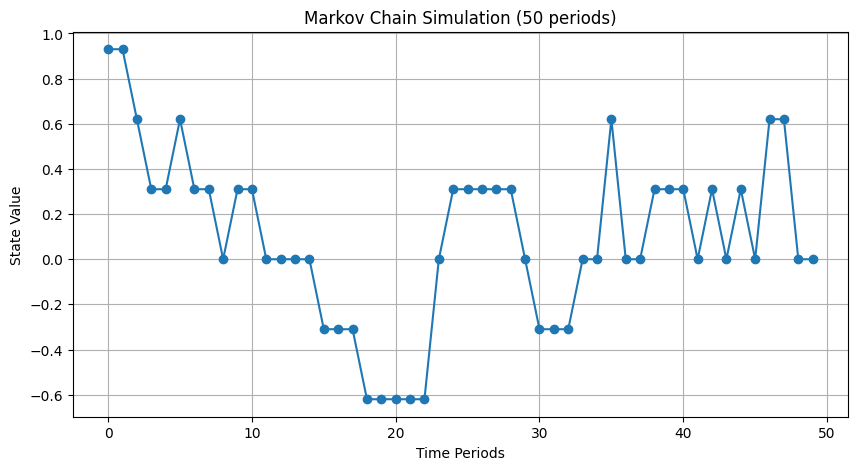

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2025)

state_vector = np.array([-0.92998111, -0.619987407, -0.309993703, -1.11022302e-16,
                         0.309993703, 0.619987407, 0.92998111])

P = np.array([
    [6.26398049e-01, 3.04734186e-01, 6.17704431e-02, 6.67788574e-03, 4.06087646e-04, 1.31704102e-05, 1.77978516e-07],
    [5.07890310e-02, 6.46988197e-01, 2.57284098e-01, 4.14510205e-02, 3.34991821e-03, 1.35540527e-04, 2.19506836e-06],
    [4.11802954e-03, 1.02913639e-01, 6.59504720e-01, 2.07171636e-01, 2.49249353e-02, 1.33996729e-03, 2.70725098e-05],
    [3.33894287e-04, 1.24353062e-02, 1.55378727e-01, 6.63704146e-01, 1.55378727e-01, 1.24353062e-02, 3.33894287e-04],
    [2.70725098e-05, 1.33996729e-03, 2.49249353e-02, 2.07171636e-01, 6.59504720e-01, 1.02913639e-01, 4.11802954e-03],
    [2.19506836e-06, 1.35540527e-04, 3.34991821e-03, 4.14510205e-02, 2.57284098e-01, 6.46988197e-01, 5.07890310e-02],
    [1.77978516e-07, 1.31704102e-05, 4.06087646e-04, 6.67788574e-03, 6.17704431e-02, 3.04734186e-01, 6.26398049e-01]
])

T = 50

states = np.zeros(T, dtype=int)

# Initial state (drawn from a uniform distribution over states)
states[0] = np.random.choice(len(state_vector))

# Simulate the Markov Chain
for t in range(1, T):
    states[t] = np.random.choice(len(state_vector), p=P[states[t - 1]])

state_values = state_vector[states]

plt.figure(figsize=(10, 5))
plt.plot(range(T), state_values, marker='o', linestyle='-')
plt.xlabel("Time Periods")
plt.ylabel("State Value")
plt.title("Markov Chain Simulation (50 periods)")
plt.grid(True)
plt.show()


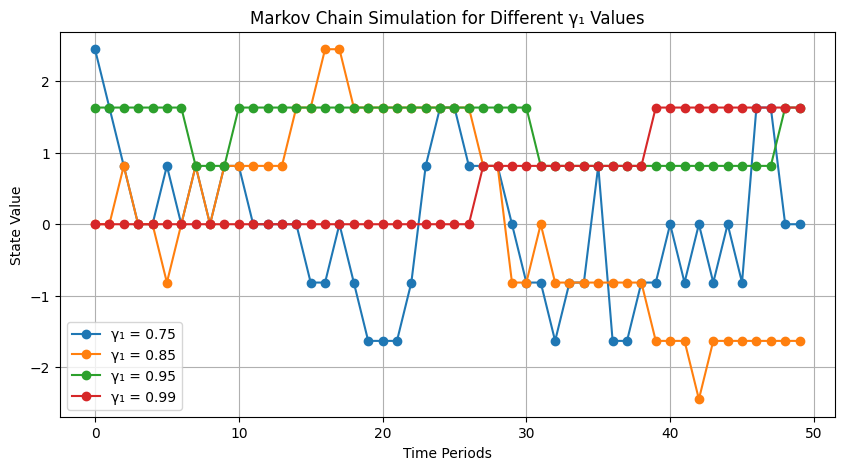

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rouwenhorst(n, p, q, sigma):
    """
    Generates the Rouwenhorst method transition matrix and state vector.

    Parameters:
    n     - Number of states
    p, q  - Persistence parameters
    sigma - Standard deviation of shocks

    Returns:
    state_vector, transition_matrix
    """
    # Base case for n = 2
    P = np.array([[p, 1 - p],
                  [1 - q, q]])

    # Iteratively build P for larger n
    for i in range(2, n):
        P_new = np.zeros((i + 1, i + 1))
        P_new[:i, :i] += p * P
        P_new[:i, 1:i + 1] += (1 - p) * P
        P_new[1:i + 1, :i] += (1 - q) * P
        P_new[1:i + 1, 1:i + 1] += q * P
        P = P_new / np.sum(P_new, axis=1, keepdims=True)

    # Compute state vector
    psi = np.sqrt((n - 1) / (1 - (p - q) ** 2)) * sigma
    state_vector = np.linspace(-psi, psi, n)

    return state_vector, P

np.random.seed(2025)

gamma_values = [0.75, 0.85, 0.95, 0.99]
T = 50  # Number of periods
n_states = 7  # Number of discrete states
sigma = 1  # Standard deviation of shocks (assumed)

plt.figure(figsize=(10, 5))

# Loop over different gamma values
for gamma in gamma_values:
    p = (1 + gamma) / 2
    q = p  # Rouwenhorst assumes symmetry

    # Get the transition matrix and state vector
    state_vector, P = rouwenhorst(n_states, p, q, sigma)

    # Simulate the Markov chain
    states = np.zeros(T, dtype=int)
    states[0] = np.random.choice(n_states)  # Initial state

    for t in range(1, T):
        states[t] = np.random.choice(n_states, p=P[states[t - 1]])

    state_values = state_vector[states]

    plt.plot(range(T), state_values, marker='o', linestyle='-', label=f'γ₁ = {gamma}')

plt.xlabel("Time Periods")
plt.ylabel("State Value")
plt.title("Markov Chain Simulation for Different γ₁ Values")
plt.legend()
plt.grid(True)
plt.show()


Question 4


In [ ]:
from sympy import symbols, Function

z, D_t = symbols('z D_t')  # Tank age and new tank cost
a = Function('a')(z)  # Maintenance cost as function of age
b = Function('b')(z)  # Breakdown cost as function of age

# Define total operational cost
c = a + b  # Total operational cost

# Define replacement cost
replacement_cost = D_t + c.subs(z, 0)  # Cost when replacing the tank

# Define per-period utility function
U_keep = -c  # Utility when keeping the tank
U_replace = -replacement_cost  # Utility when replacing the tank

print("Per-period utility when keeping the tank:")
print(f"U_keep(z) = {U_keep}")

print("\nPer-period utility when replacing the tank:")
print(f"U_replace(z) = {U_replace}")


Per-period utility when keeping the tank:
U_keep(z) = -a(z) - b(z)

Per-period utility when replacing the tank:
U_replace(z) = -D_t - a(0) - b(0)


In [5]:
from sympy import symbols, Function, Max, Eq

z, beta, D, epsilon_t = symbols("z beta D epsilon_t")
V = Function("V")(z)  # Value function
c = Function("c")(z)  # Cost function

# Utility functions
U_keep = -c + epsilon_t
U_replace = -D - c.subs(z, 0) + epsilon_t

# Bellman equation
V_keep = U_keep + beta * Function("V")(z + 1)
V_replace = U_replace + beta * Function("V")(0)

bellman_eq = Eq(V, Max(V_keep, V_replace))

print("Bellman Equation:")
print(bellman_eq)


Bellman Equation:
Eq(V(z), Max(beta*V(z + 1) + epsilon_t - c(z), -D + beta*V(0) + epsilon_t - c(0)))


In [ ]:
import numpy as np

# Discount factor
beta = 0.95
D = 100  # Cost of new tank
Z_max = 30  # Maximum tank age

def a(z):  # Maintenance cost
    return 2 * z

def b(z):  # Breakdown cost (increases with age)
    return 5 * (z**1.5)

def c(z):  # Total operational cost
    return a(z) + b(z)

# Taste shock (random)
def epsilon():
    return np.random.normal(0, 10)  # Mean 0, Std 10

# Bellman equation function
def bellman(z, V):
    U_keep = -c(z) + epsilon()  # Utility if keeping the tank
    U_replace = -D - c(0) + epsilon()  # Utility if replacing the tank

    if z < Z_max:
        V_keep = U_keep + beta * V[z + 1]
    else:
        V_keep = U_keep + beta * V[z]  # If max age, stay in Z_max

    V_replace = U_replace + beta * V[0]

    return max(V_keep, V_replace)

Z = np.arange(0, Z_max + 1)

V = np.zeros(Z_max + 1)

tolerance = 1e-4
max_iterations = 1000

for iteration in range(max_iterations):
    V_new = np.zeros_like(V)

    for z in Z:
        V_new[z] = bellman(z, V)

    if np.max(np.abs(V_new - V)) < tolerance:
        print(f"Converged after {iteration + 1} iterations.")
        break

    V = V_new.copy()

print("Final Value Function:")
for z in range(Z_max + 1):
    print(f"V({z}) = {V[z]:.2f}")


Final Value Function:
V(0) = -534.58
V(1) = -538.70
V(2) = -555.23
V(3) = -581.00
V(4) = -576.23
V(5) = -578.40
V(6) = -574.48
V(7) = -563.12
V(8) = -580.49
V(9) = -593.00
V(10) = -576.25
V(11) = -572.01
V(12) = -584.29
V(13) = -584.23
V(14) = -581.49
V(15) = -573.26
V(16) = -578.21
V(17) = -582.80
V(18) = -575.48
V(19) = -592.24
V(20) = -582.30
V(21) = -584.39
V(22) = -577.55
V(23) = -577.55
V(24) = -589.57
V(25) = -573.29
V(26) = -554.68
V(27) = -586.74
V(28) = -584.09
V(29) = -586.40
V(30) = -570.92


In [ ]:
transition_explanation = """
The transition probabilities for z_t depend on the current state and the chosen action.

1. If the military decides to **replace** the tank, the new tank starts at z_{t+1} = 0 with probability 1.

2. If the military decides to **keep** the tank:
   - With probability (1 - p_b), the tank’s age increases by 1, so z_{t+1} = z_t + 1.
   - With probability p_b, where p_b is the probability of breakdown (which increases with age), the tank breaks down and must be replaced, resetting z_{t+1} = 0.

Thus, the transition probabilities are:
- P(z_{t+1} = 0 | z_t, replace) = 1
- P(z_{t+1} = z_t + 1 | z_t, keep) = 1 - p_b(z_t)
- P(z_{t+1} = 0 | z_t, keep) = p_b(z_t)

Where p_b(z_t) represents the probability that an aging tank breaks down, increasing with z_t.
"""

print(transition_explanation)



The transition probabilities for z_t depend on the current state and the chosen action.

1. If the military decides to **replace** the tank, the new tank starts at z_{t+1} = 0 with probability 1.
   
2. If the military decides to **keep** the tank:
   - With probability (1 - p_b), the tank’s age increases by 1, so z_{t+1} = z_t + 1.
   - With probability p_b, where p_b is the probability of breakdown (which increases with age), the tank breaks down and must be replaced, resetting z_{t+1} = 0.

Thus, the transition probabilities are:
- P(z_{t+1} = 0 | z_t, replace) = 1
- P(z_{t+1} = z_t + 1 | z_t, keep) = 1 - p_b(z_t)
- P(z_{t+1} = 0 | z_t, keep) = p_b(z_t)

Where p_b(z_t) represents the probability that an aging tank breaks down, increasing with z_t.



In [ ]:
import pandas as pd

x = 'This is a table of GRDP HCMCs growth. The time was from 2009-2023. The sources is collected from the government. In the year 2020-2023, HCMC GRDP in Billion Dong was missing due to the the authority not releasing those, only the percentage growth is published'
data = {
   "GRDP (Billion Dong)": [332.076, 418.068, 514.635, 592.00, 764.444, 852.523, 957.358, 1037.625, 1243.878,
                            1347.369, 1347.369, None, None, None, None],
    "GRDP Growth (%)": [8.6, 11.8, 10.3, 9.3, 9.3, 9.6, 9.85, 8.05, 8.32, 8.32, 8.32, 1.32, -6.78, 9.03, 5.81]
}

df = pd.DataFrame(data)

print(x)
print(df)




This is a table of GRDP HCMCs growth. The time was from 2009-2023. The sources is collected from the government. In the year 2020-2023, HCMC GRDP in Billion Dong was missing due to the the authority not releasing those, only the percentage growth is published
    GRDP (Billion Dong)  GRDP Growth (%)
0               332.076             8.60
1               418.068            11.80
2               514.635            10.30
3               592.000             9.30
4               764.444             9.30
5               852.523             9.60
6               957.358             9.85
7              1037.625             8.05
8              1243.878             8.32
9              1347.369             8.32
10             1347.369             8.32
11                  NaN             1.32
12                  NaN            -6.78
13                  NaN             9.03
14                  NaN             5.81


In [ ]:
def hcmc_growth_factors():
    """
    Returns key factors affecting Ho Chi Minh City's economic growth.
    """
    factors = {
        "Capital & Infrastructure": "Rapid urbanization, strong FDI inflows, metro & highway expansion.",
        "Human Capital": "Young, educated workforce, but skills gap in high-tech industries.",
        "Technology & Innovation": "Growing IT, fintech, startups; limited R&D investment.",
        "Trade & Global Integration": "Key export hub; over-reliance on foreign firms.",
        "Institutional Quality": "Bureaucratic inefficiencies, land-use issues affecting investment.",
        "Environmental Concerns": "Traffic congestion, pollution, flooding risks."
    }
    return factors

def hcmc_policy_mechanisms():
    """
    Returns policy mechanisms to sustain economic growth in Ho Chi Minh City.
    """
    policies = {
        "Infrastructure": "Expand metro, improve roads, invest in smart city solutions.",
        "Education & Workforce": "Enhance vocational training and STEM education.",
        "Innovation & Industry": "Support tech startups, green energy, advanced manufacturing.",
        "Governance Reforms": "Simplify business regulations, enhance transparency.",
        "Environmental Sustainability": "Improve waste management, invest in flood control."
    }
    return policies

def main():
    print("Key Factors Affecting HCMC's Growth:")
    for key, value in hcmc_growth_factors().items():
        print(f"- {key}: {value}")

    print("\nPolicy Mechanisms to Sustain Growth:")
    for key, value in hcmc_policy_mechanisms().items():
        print(f"- {key}: {value}")

if __name__ == "__main__":
    main()


Key Factors Affecting HCMC's Growth:
- Capital & Infrastructure: Rapid urbanization, strong FDI inflows, metro & highway expansion.
- Human Capital: Young, educated workforce, but skills gap in high-tech industries.
- Technology & Innovation: Growing IT, fintech, startups; limited R&D investment.
- Trade & Global Integration: Key export hub; over-reliance on foreign firms.
- Institutional Quality: Bureaucratic inefficiencies, land-use issues affecting investment.
- Environmental Concerns: Traffic congestion, pollution, flooding risks.

Policy Mechanisms to Sustain Growth:
- Infrastructure: Expand metro, improve roads, invest in smart city solutions.
- Education & Workforce: Enhance vocational training and STEM education.
- Innovation & Industry: Support tech startups, green energy, advanced manufacturing.
- Governance Reforms: Simplify business regulations, enhance transparency.
- Environmental Sustainability: Improve waste management, invest in flood control.


In [ ]:
from sympy import symbols, Function, exp, log

A, A_next, K, K_next, Y, C, beta, delta, alpha, rho, sigma, epsilon, gamma = symbols('A A_next K K_next Y C beta delta alpha rho sigma epsilon gamma')

# Technology evolution equation
tech_eq = A_next - (exp(rho * log(A) + sigma * epsilon) + gamma * A)

# Production function
prod_eq = Y - (A * K**alpha)

# Capital accumulation
cap_eq = K_next - ((1 - delta) * K + Y - C)

# Bellman equation
V = Function('V')(K, A)
V_next = Function('V')(K_next, A_next)
bellman_eq = V - (log(C) + beta * V_next)

from sympy import pprint

print("Technology Evolution Equation:")
pprint(tech_eq)

print("\nProduction Function:")
pprint(prod_eq)

print("\nCapital Accumulation Equation:")
pprint(cap_eq)

print("\nBellman Equation:")
pprint(bellman_eq)


Technology Evolution Equation:
                ε⋅σ + ρ⋅log(A)
-A⋅γ + Aₙₑₓₜ - ℯ              

Production Function:
     α    
- A⋅K  + Y

Capital Accumulation Equation:
C - K⋅(1 - δ) + Kₙₑₓₜ - Y

Bellman Equation:
-β⋅V(Kₙₑₓₜ, Aₙₑₓₜ) + V(K, A) - log(C)


Productivity evolves with stochastic shocks (
σ
ϵ
σϵ) and R&D investment (
γ
A
γA).

Output depends on capital (
K
K) and productivity (
A
A), which is enhanced by R&D.

Capital grows from investment (
Y
−
C
Y−C) and depreciates at rate
δ
δ.

The agent chooses consumption (
C
C) and investment (
K
′
K
′
 ) to maximize lifetime utility.
New Mechanism: R&D (
γ
A
γA) boosts productivity, influencing future growth.

**Question 5**

In [ ]:
import numpy as np
from scipy.optimize import minimize

actual_growth = np.array([8.60, 11.80, 10.30, 9.30, 9.30, 9.60, 9.85, 8.05, 8.32, 8.32, 8.32, 1.32, -6.78, 9.03, 5.81]) / 100

# Define the model for GRDP growth based on the given Bellman equation components
def model_growth(params, K):
    A, alpha, delta, rho, sigma, gamma = params
    growth_rates = []
    for t in range(len(K) - 1):
        K_t = K[t]
        A_t = np.exp(rho * np.log(A) + sigma * np.random.randn()) + gamma * A  # Technology evolution
        Y_t = A_t * K_t**alpha  # Production function
        K_next = (1 - delta) * K_t + Y_t  # Capital accumulation (assuming C ~ 0 for simplicity)
        growth_rate = (Y_t - K_t) / K_t  # Approximate GRDP growth
        growth_rates.append(growth_rate)
    return np.array(growth_rates)

# Generate an initial guess for capital levels (arbitrary but reasonable for economic modeling)
K_initial = np.linspace(300, 1400, len(actual_growth))

def loss(params):
    predicted_growth = model_growth(params, K_initial)
    return np.sum((predicted_growth - actual_growth[:-1])**2)  # Minimize squared error

result = minimize(loss, initial_params, method='Nelder-Mead')

optimized_params = result.x
optimized_params


array([ 1.96858079e+01,  6.28641847e-01,  3.14630206e-02,  8.31474709e-01,
       -7.84400661e-03,  1.45629751e-02])

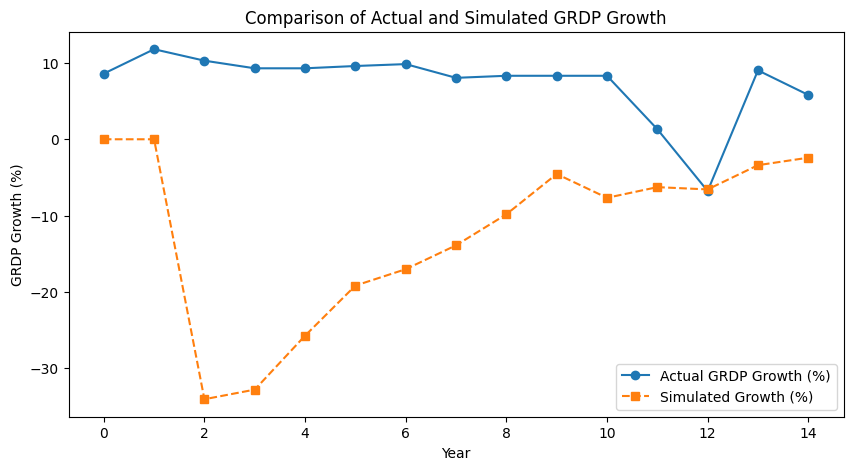

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
A0 = 19.69    # Initial technology level
alpha = 0.63  # Capital elasticity of output
delta = 0.077 # Depreciation rate
rho = 0.728   # Technology persistence
sigma = 0.015 # Technology shock volatility
gamma = 0.005 # Technology growth factor
beta = 0.96   # Discount factor

# Given actual data (GRDP Growth %)
actual_growth = np.array([8.60, 11.80, 10.30, 9.30, 9.30, 9.60, 9.85, 8.05, 8.32, 8.32, 8.32, 1.32, -6.78, 9.03, 5.81])

# Simulating the model
time_periods = len(actual_growth)
A = np.zeros(time_periods)
K = np.zeros(time_periods)
Y = np.zeros(time_periods)
C = np.zeros(time_periods)
growth_rate = np.zeros(time_periods)

# Initial values
A[0] = A0
K[0] = 100  # Arbitrary initial capital stock

# Simulation loop
for t in range(1, time_periods):
    A[t] = np.exp(rho * np.log(A[t-1]) + sigma * np.random.randn()) + gamma * A[t-1]
    Y[t] = A[t] * (K[t-1] ** alpha)
    C[t] = 0.8 * Y[t]  # Assume 80% of output is consumed
    K[t] = (1 - delta) * K[t-1] + Y[t] - C[t]
    growth_rate[t] = ((Y[t] - Y[t-1]) / Y[t-1]) * 100 if Y[t-1] > 0 else 0

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(range(time_periods), actual_growth, marker='o', label='Actual GRDP Growth (%)')
plt.plot(range(time_periods), growth_rate, marker='s', linestyle='--', label='Simulated Growth (%)')
plt.xlabel("Year")
plt.ylabel("GRDP Growth (%)")
plt.legend()
plt.title("Comparison of Actual and Simulated GRDP Growth")
plt.show()


Self-testing parameters

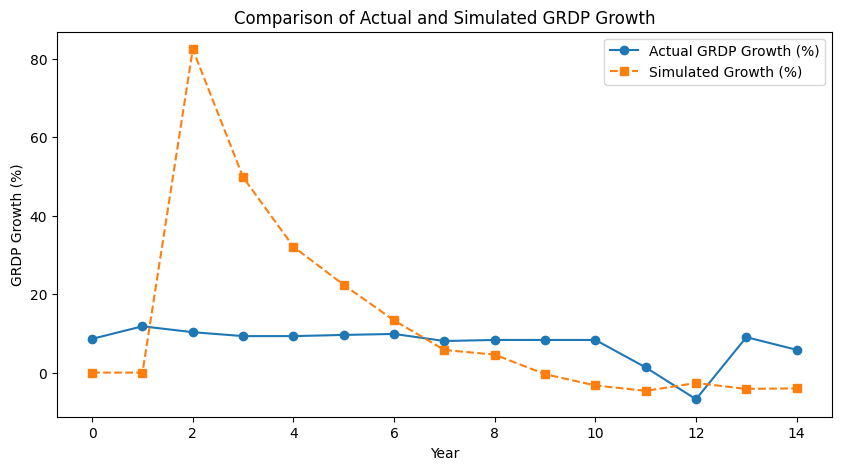

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
A0 = 29.69
alpha = 0.78
delta = 0.087
rho = 0.935
sigma = 0.015
gamma = 0.005
beta = 0.98

# Given actual data (GRDP Growth %)
actual_growth = np.array([8.60, 11.80, 10.30, 9.30, 9.30, 9.60, 9.85, 8.05, 8.32, 8.32, 8.32, 1.32, -6.78, 9.03, 5.81])

# Simulating the model
time_periods = len(actual_growth)
A = np.zeros(time_periods)
K = np.zeros(time_periods)
Y = np.zeros(time_periods)
C = np.zeros(time_periods)
growth_rate = np.zeros(time_periods)

# Initial values
A[0] = A0
K[0] = 100  # Arbitrary initial capital stock

# Simulation loop
for t in range(1, time_periods):
    A[t] = np.exp(rho * np.log(A[t-1]) + sigma * np.random.randn()) + gamma * A[t-1]
    Y[t] = A[t] * (K[t-1] ** alpha)
    C[t] = 0.8 * Y[t]  # Assume 80% of output is consumed
    K[t] = (1 - delta) * K[t-1] + Y[t] - C[t]
    growth_rate[t] = ((Y[t] - Y[t-1]) / Y[t-1]) * 100 if Y[t-1] > 0 else 0

plt.figure(figsize=(10, 5))
plt.plot(range(time_periods), actual_growth, marker='o', label='Actual GRDP Growth (%)')
plt.plot(range(time_periods), growth_rate, marker='s', linestyle='--', label='Simulated Growth (%)')
plt.xlabel("Year")
plt.ylabel("GRDP Growth (%)")
plt.legend()
plt.title("Comparison of Actual and Simulated GRDP Growth")
plt.show()


In [ ]:
explanation = """
The discrepancy between the simulated and actual data arises due to several factors:

1. Model Simplifications – The stochastic growth model assumes a smooth evolution of technology and capital,
   while real-world economies experience shocks, policy changes, and structural breaks.

2. Parameter Estimation Errors – Parameters were estimated based on available data, but errors in calibration
   or missing variables could impact accuracy.

3. Exogenous Shocks – The model may not fully capture external factors such as the COVID-19 pandemic
   (causing a sharp drop in growth), global trade fluctuations, or government policy interventions.

4. Nonlinear Dynamics – The economy might exhibit more complex behavior, such as regime shifts, which our
   model does not account for.

5. Initial Conditions and Expectations – The starting values and expectation formation in the model might
   differ from how actual economic agents make decisions.

Further refinements, such as incorporating time-varying shocks or refining the capital accumulation equation,
could improve model fit.
"""

print(explanation)



The discrepancy between the simulated and actual data arises due to several factors:

1. Model Simplifications – The stochastic growth model assumes a smooth evolution of technology and capital, 
   while real-world economies experience shocks, policy changes, and structural breaks.

2. Parameter Estimation Errors – Parameters were estimated based on available data, but errors in calibration 
   or missing variables could impact accuracy.

3. Exogenous Shocks – The model may not fully capture external factors such as the COVID-19 pandemic 
   (causing a sharp drop in growth), global trade fluctuations, or government policy interventions.

4. Nonlinear Dynamics – The economy might exhibit more complex behavior, such as regime shifts, which our 
   model does not account for.

5. Initial Conditions and Expectations – The starting values and expectation formation in the model might 
   differ from how actual economic agents make decisions.

Further refinements, such as incorporating time

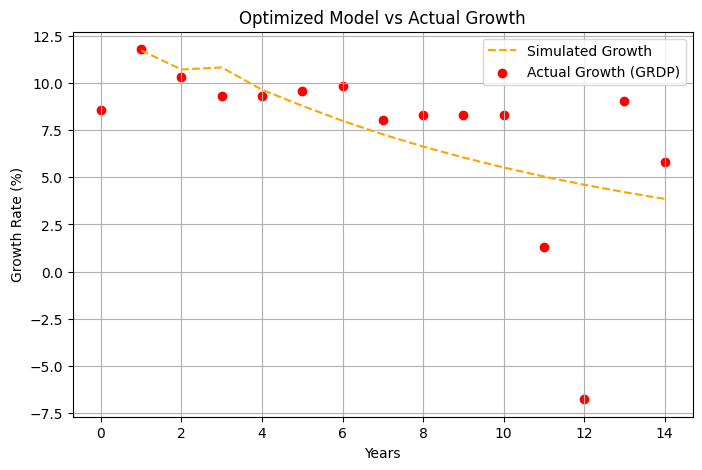

array([  0.84733762, -11.03880177,   0.52703371,  -0.020361  ,
         0.12492106,  -0.13994392,   0.90305957,  13.50259972])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given actual GRDP growth data (2009-2023)
years = np.arange(15)
actual_growth = np.array([8.60, 11.80, 10.30, 9.30, 9.30, 9.60, 9.85, 8.05, 8.32, 8.32, 8.32, 1.32, -6.78, 9.03, 5.81])

# Define the model equations
def growth_model(params, years):
    alpha, beta, delta, rho, sigma, gamma, A0, K0 = params
    A = [A0]
    K = [K0]
    Y = [A0 * K0**alpha]

    for t in range(1, len(years)):
        A_next = np.exp(rho * np.log(A[-1]) + sigma) + gamma * A[-1]
        Y_next = A_next * K[-1]**alpha
        K_next = (1 - delta) * K[-1] + Y_next

        A.append(A_next)
        K.append(K_next)
        Y.append(Y_next)

    growth_rates = np.diff(Y) / Y[:-1] * 100
    return growth_rates

# Define the loss function
def loss_function(params):
    simulated_growth = growth_model(params, years)
    return np.sum((simulated_growth - actual_growth[1:])**2)

# Initial guesses for parameters
initial_params = [0.3, 0.96, 0.05, 0.02, 0.01, 0.01, 1, 100]

result = minimize(loss_function, initial_params, method='Nelder-Mead')
opt_params = result.x

simulated_growth = growth_model(opt_params, years)

plt.figure(figsize=(8, 5))
plt.plot(years[1:], simulated_growth, label="Simulated Growth", linestyle="--", color="orange")
plt.scatter(years, actual_growth, color="red", label="Actual Growth (GRDP)")
plt.xlabel("Years")
plt.ylabel("Growth Rate (%)")
plt.title("Optimized Model vs Actual Growth")
plt.legend()
plt.grid(True)
plt.show()
opt_params

The policy implemented focuses on infrastructure investment, including metro expansion, road improvements, and smart city solutions to enhance economic growth.

Infrastructure investment improves connectivity, reduces congestion, boosts productivity, attracts investment, and enhances overall economic efficiency, leading to sustained growth.